# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_merge_df = pd.merge(study_results, mouse_metadata, how='left', on ='Mouse ID')

# Display the data table for preview
data_merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [61]:
# Checking the number of mice.
mice_count = data_merge_df["Mouse ID"].unique()
len(mice_count)

249

In [62]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = data_merge_df.loc[data_merge_df.duplicated(["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice_id                                            

array(['g989'], dtype=object)

In [63]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dup_mouse = data_merge_df[data_merge_df['Mouse ID'] == 'g989']
all_dup_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [64]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = data_merge_df.loc[data_merge_df['Mouse ID'] != 'g989', :]
clean_df
clean_df.to_csv('clean_data.csv', index=False)

In [65]:
# Checkiclean_dfng the number of mice in the clean DataFrame.
mice_count = len(clean_df['Mouse ID'].unique())
mice_count

248

## Summary Statistics

In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
summary_statistics_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
summary_statistics_var = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
summary_statistics_std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
summary_statistics_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
#Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_data = {"Mean Tumor Volume": summary_statistics_mean, "Median Tumor Volume": summary_statistics_median, "Tumor Volume Variance": summary_statistics_var, "Tumor Volume Std. Dev": summary_statistics_std, "Tumor Volume Std. Err": summary_statistics_sem}
summary_statistics_df = pd.DataFrame(summary_data)
print(summary_statistics_df)

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev  Tumor Volume S

In [67]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line(did this during study group)
summary_stats = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']}).describe()
summary_stats

Tumor Volume (mm3)                                            
                    mean     median        var        std        sem
count          10.000000  10.000000  10.000000  10.000000  10.000000
mean           50.975982  49.902123  47.858440   6.821103   0.502785
std             5.621289   4.705415  16.008423   1.216096   0.103473
min            40.216745  40.673236  23.486704   4.846308   0.320955
25%            52.388490  50.778739  40.249804   6.342952   0.475424
50%            53.060651  51.819532  46.192684   6.794337   0.530365
75%            54.183257  52.396036  60.738703   7.793357   0.579276
max            55.235638  53.698743  68.553577   8.279709   0.603860

## Bar and Pie Charts

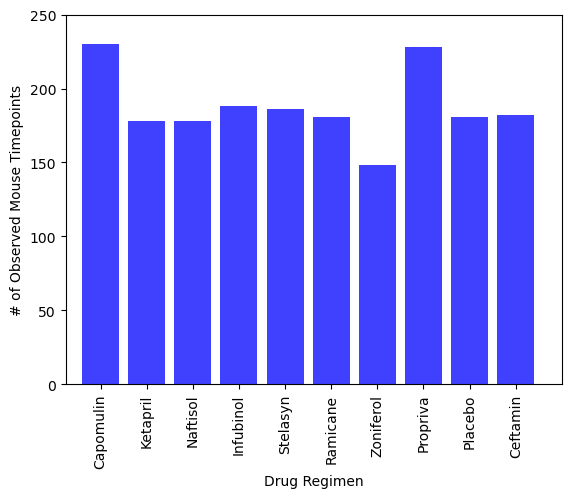

In [68]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
x_axis = clean_df["Drug Regimen"].unique()
y_axis = clean_df.groupby('Drug Regimen')['Mouse ID'].count()

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.xlim(-0.75, 10)
plt.ylim(0, 250)
plt.bar(x_axis, y_axis, color='blue',alpha=0.75, align='center')
plt.show()

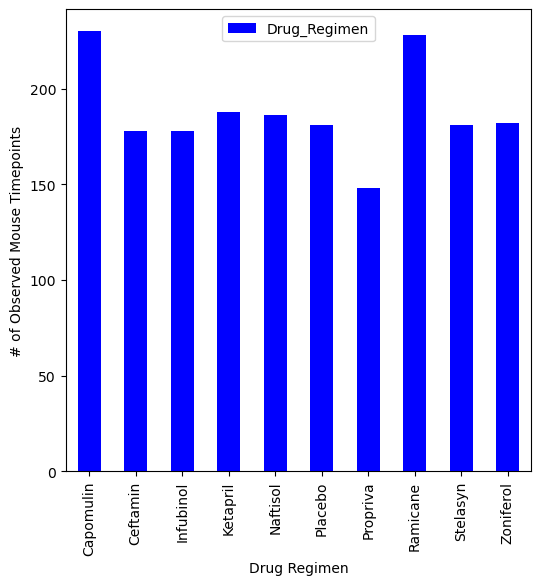

In [69]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Drug_Regimen = clean_df["Drug Regimen"].unique()
Time_point = clean_df.groupby('Drug Regimen')['Timepoint'].count()
Data_set = pd.DataFrame({"Drug_Regimen": Time_point})

chart_pyplot = Data_set.plot(kind="bar", color="Blue",figsize=(6,6), xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")
plt.show()

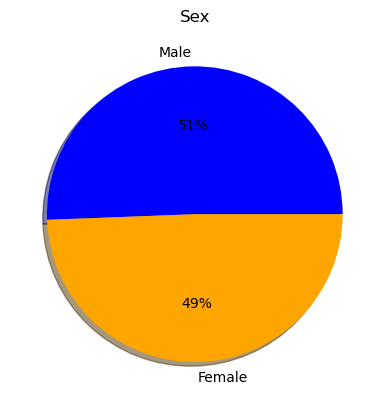

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

lables = ["Male", "Female"]
sizes = [958, 935]
colors = ["blue", "orange"]
plt.title("Sex")
plt.pie(sizes, labels=lables, colors=colors,
        autopct="%1.f%%", shadow=True, startangle=360)
plt.show()
#new = data_merge_df[["Mouse ID", "Sex"]]
#female_count = (new['Sex'] == 'Female').sum()
#male_count = (new['Sex'] == 'Male').sum()
#male_count

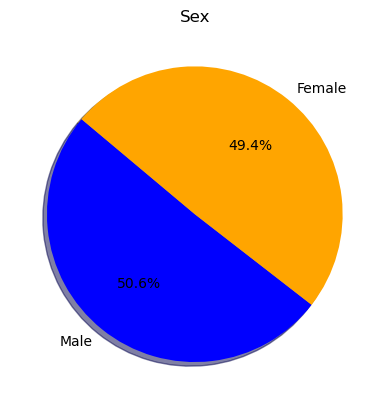

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [958, 935]
colors = ["blue", "orange"]

plt.title("Sex")
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

## Quartiles, Outliers and Boxplots

In [72]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_table = data_merge_df[data_merge_df["Drug Regimen"] == "Capomulin"]
Tumorvolume_Capomulin = Capomulin_table["Tumor Volume (mm3)"].sum()

Ramicane_table = data_merge_df[data_merge_df["Drug Regimen"] == "Ramicane"]
Tumorvolume_Ramicane = Ramicane_table["Tumor Volume (mm3)"].sum()

Infubinol_table = data_merge_df[data_merge_df["Drug Regimen"] == "Infubinol"]
Tumorvolume_Infubinol = Infubinol_table["Tumor Volume (mm3)"].sum()

Ceftamin_table = data_merge_df[data_merge_df["Drug Regimen"] == "Ceftamin"]
Tumorvolume_Ceftamin = Ceftamin_table["Tumor Volume (mm3)"].sum()

# Start by getting the last (greatest) timepoint for each mouse
groupby_mouse_id = clean_df.groupby('Mouse ID')
last_timepoint = groupby_mouse_id["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_merge = pd.merge(last_timepoint, clean_df, how="left", on=['Mouse ID', 'Timepoint'])
timepoint_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [74]:
# Put treatments into a list for a loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to fill with tumor volume data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# Add a subset for each treatment
for i in treatments:
    subset = timepoint_merge[timepoint_merge['Drug Regimen'] == i]['Tumor Volume (mm3)']
    tumor_vol.append(subset)
    
    quartiles = subset.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    print(f"{i}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


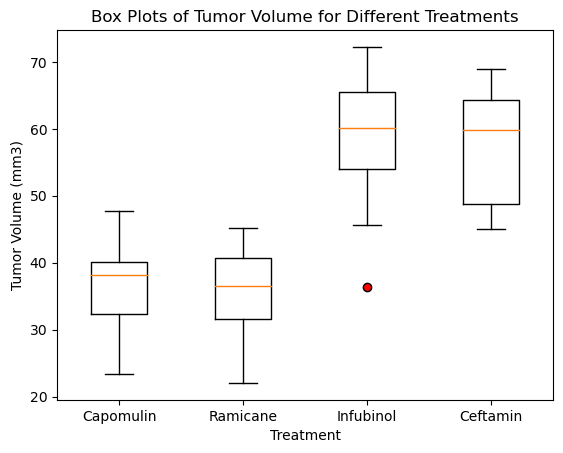

In [75]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol, labels=treatments, flierprops=dict(markerfacecolor='red'))

# Add labels and title
plt.xlabel("Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Box Plots of Tumor Volume for Different Treatments")

# Show the plot
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin in treatment of mouse id l509 ')

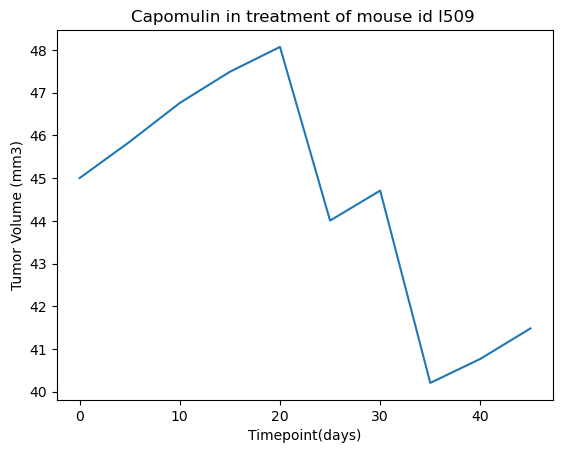

In [76]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_data_single = clean_df[(clean_df['Drug Regimen'] == 'Capomulin') & (clean_df['Mouse ID'] == 'l509')]
Capomulin_data_single
plt.plot(Capomulin_data_single['Timepoint'], Capomulin_data_single['Tumor Volume (mm3)'])
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)") 
plt.title("Capomulin in treatment of mouse id l509 ")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

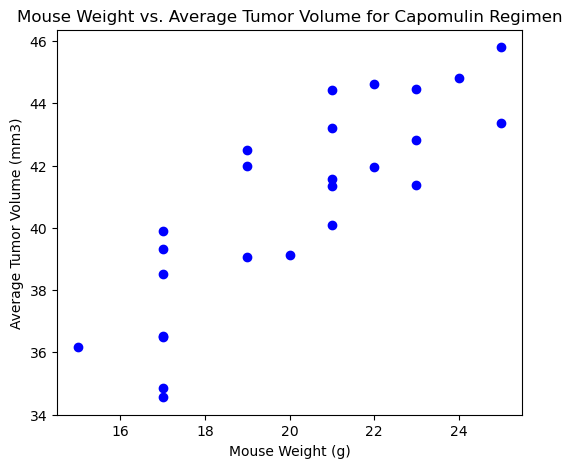

In [77]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()
plt.figure(figsize=(6, 5)) 
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='b', label='Mouse Data')
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

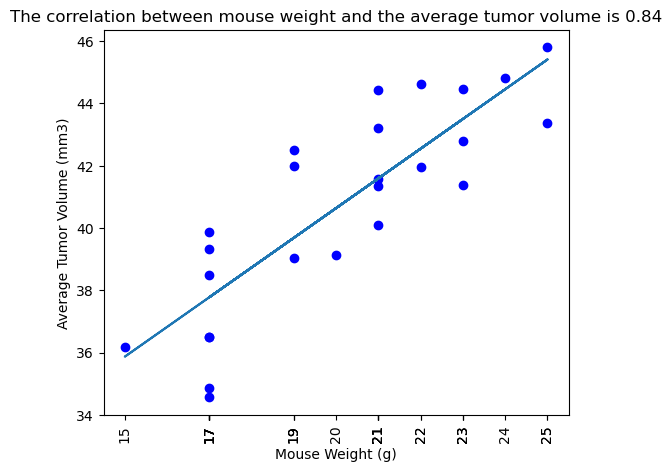

In [90]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(mouse_weights,average_tumor_volume )
correlation_coefficient = np.corrcoef(mouse_weights, average_tumor_volume)[0, 1]
correlation_coefficient
# Create the regression line
pe_fit = pe_slope * mouse_weights + pe_int
# Plot the regression line
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()
plt.figure(figsize=(6, 5)) 
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='b', label='Mouse Data')
plt.title("The correlation between mouse weight and the average tumor volume is 0.84")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(mouse_weights,pe_fit,"-")
plt.xticks(mouse_weights, rotation=90)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()